### Work Flow
Data collection ---> Data preprocessing ---> Data Analysis ---> Model Preparation ---> Model Evaluation

In [1]:
# import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Data Collection

In [2]:
# load the dataset
winequality = pd.read_csv('winequalityN.csv')
print(winequality.shape)
winequality.head()

(6497, 13)


,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


### Data Preprocessing

In [3]:
# get some information about the dataset
winequality.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [4]:
# check for missing values
winequality.isnull().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [5]:
# fill in the missing values
for col, value in winequality.items():
    if col != 'type':
        winequality[col] = winequality[col].fillna(winequality[col].mean())

In [6]:
# recheck for missing values
winequality.isnull().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

### Data Analysis

###### perform some statistical analysis on the dataset

In [7]:
# checking statistical information about the dataframe
winequality.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.295751,0.164548,0.145231,4.757392,0.035031,17.749400,56.521855,0.002999,0.160637,0.148768,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [8]:
# checking the types of wine present
winequality['type'].value_counts()

white    4898
red      1599
Name: type, dtype: int64

In [9]:
# checking the quality grading of wine
winequality['quality'].value_counts()

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64

In [10]:
# calculate teh correlation matrix
correlation_matrix = winequality.corr()

# set the threshold for correlation
correlation_threshold = 0.5

In [11]:
# find highly correlated features with wine quality
highly_correlated_features = np.abs(correlation_matrix['quality']).sort_values(ascending=False)
highly_correlated_features= highly_correlated_features[highly_correlated_features > correlation_threshold]

# print the highly correlated features
print("Highly Correlated Features with Wine Quality: ")
for feature, correlation in highly_correlated_features.iteritems():
    print(f"{feature}: {correlation:.2f}")

Highly Correlated Features with Wine Quality: 
quality: 1.00


In [12]:
# Find highly correlated features
highly_correlated_features = correlation_matrix[((correlation_matrix > correlation_threshold) | (correlation_matrix < -correlation_threshold)) & (correlation_matrix != 1)]
highly_correlated_features = highly_correlated_features.unstack().dropna().reset_index()

# Print the highly correlated features
print("Highly Correlated Features:")
for index, row in highly_correlated_features.iterrows():
    feature1 = row['level_0']
    feature2 = row['level_1']
    correlation = row[0]
    print(f"{feature1} - {feature2}: {correlation:.2f}")

Highly Correlated Features:
residual sugar - density: 0.55
free sulfur dioxide - total sulfur dioxide: 0.72
total sulfur dioxide - free sulfur dioxide: 0.72
density - residual sugar: 0.55
density - alcohol: -0.69
alcohol - density: -0.69


###### perform data visualizations

In [13]:
# set the background of graphs
sns.set()

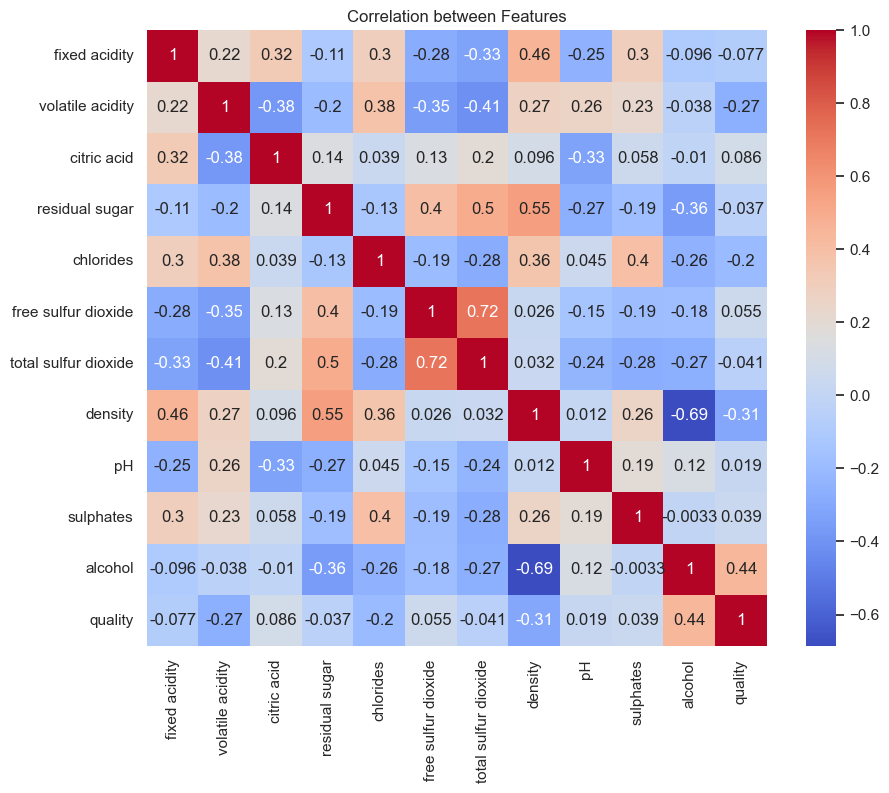

In [14]:
# visualize the correlation between features
plt.figure(figsize=(10, 8))
sns.heatmap(winequality.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation between Features')
plt.show()

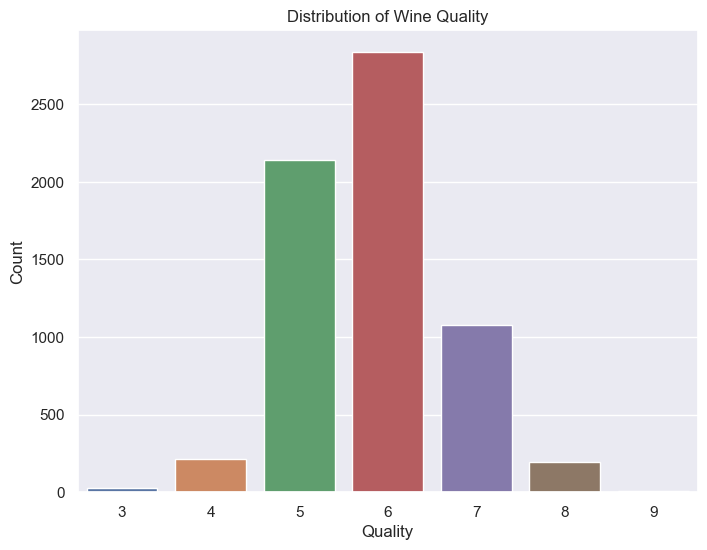

In [15]:
# visualize the distribution of wine quality
plt.figure(figsize=(8, 6))
sns.countplot(x='quality', data=winequality)
plt.title('Distribution of Wine Quality')
plt.xlabel('Quality')
plt.ylabel('Count')
plt.show()

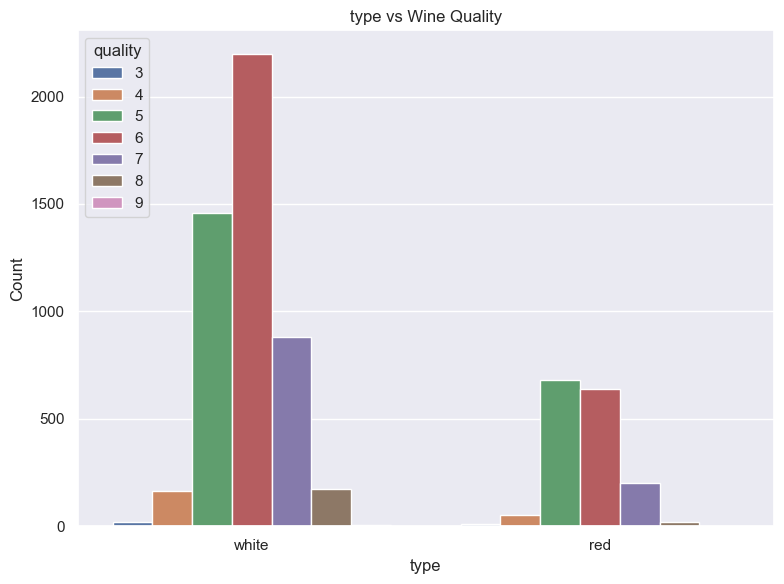

In [16]:
# bar plots for categorical features
categorical_features = winequality.select_dtypes(include=['object']).columns
plt.figure(figsize=(8, 6))
for i, feature in enumerate(categorical_features):
    plt.subplot(1, len(categorical_features), i+1)
    sns.countplot(x=feature, hue='quality', data=winequality)
    plt.title(f"{feature} vs Wine Quality")
    plt.xlabel(feature)
    plt.ylabel('Count')
plt.tight_layout()
plt.show()

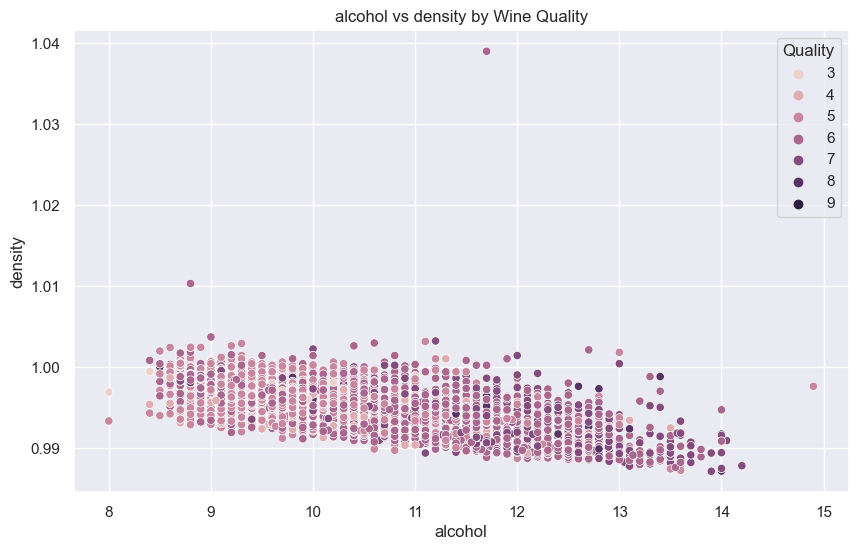

In [17]:
# set the highly correlated features
feature1 = 'alcohol'
feature2 = 'density'

# plot the relationship between the features and quality
plt.figure(figsize=(10, 6))
sns.scatterplot(x=feature1, y=feature2, hue='quality', data=winequality)
plt.xlabel(feature1)
plt.ylabel(feature2)
plt.title(f"{feature1} vs {feature2} by Wine Quality")
plt.legend(title='Quality')
plt.show()

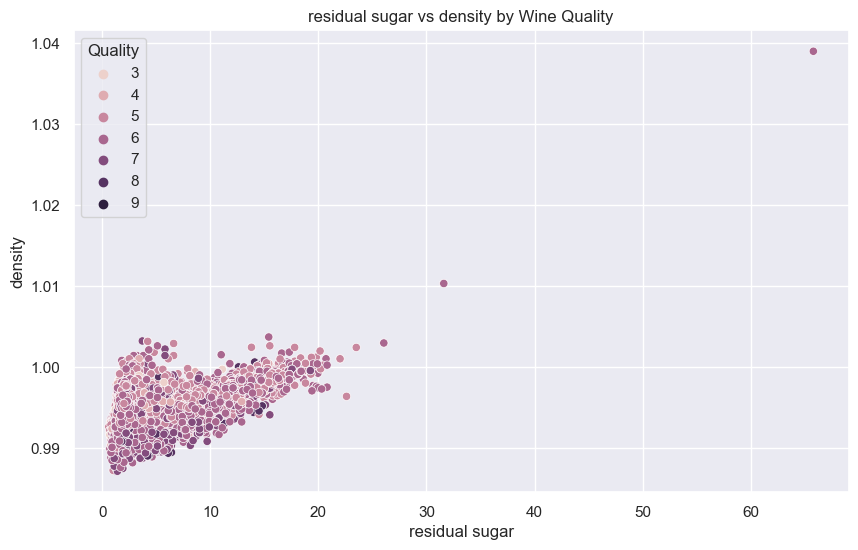

In [18]:
# set the highly correlated features
feature1 = 'residual sugar'
feature2 = 'density'

# plot the relationship between the features and quality
plt.figure(figsize=(10, 6))
sns.scatterplot(x=feature1, y=feature2, hue='quality', data=winequality)
plt.xlabel(feature1)
plt.ylabel(feature2)
plt.title(f"{feature1} vs {feature2} by Wine Quality")
plt.legend(title='Quality')
plt.show()

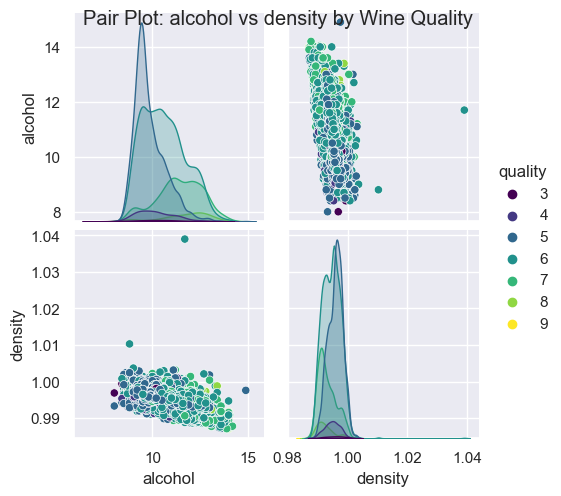

In [19]:
# Set the highly correlated features
feature1 = 'alcohol'
feature2 = 'density'

# Create a pair plot
pairplot_data = winequality[[feature1, feature2, 'quality']]
sns.pairplot(pairplot_data, hue='quality', palette='viridis')
plt.suptitle(f"Pair Plot: {feature1} vs {feature2} by Wine Quality")
plt.show()

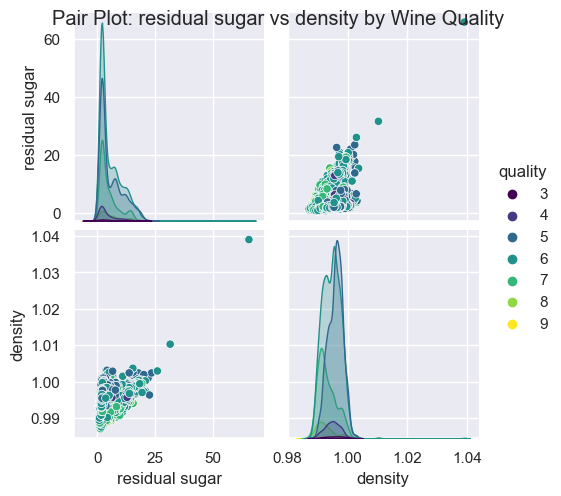

In [20]:
# Set the highly correlated features
feature1 = 'residual sugar'
feature2 = 'density'

# Create a pair plot
pairplot_data = winequality[[feature1, feature2, 'quality']]
sns.pairplot(pairplot_data, hue='quality', palette='viridis')
plt.suptitle(f"Pair Plot: {feature1} vs {feature2} by Wine Quality")
plt.show()

In [21]:
# encode the categorical column
from sklearn.preprocessing import LabelEncoder

# create an instance of Lavel encoder
label_encoder = LabelEncoder()

# encode the type coloumn
winequality['type_encoded'] = label_encoder.fit_transform(winequality['type'])

# print the encoded values
print(winequality[['type', 'type_encoded']].head())

    type  type_encoded
0  white             1
1  white             1
2  white             1
3  white             1
4  white             1


### Model Preparations

In [22]:
# import libraries for machine learning
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
import warnings
warnings.filterwarnings('ignore')

In [23]:
# feature engineering: create new features if desired
winequality['total_acidity'] = winequality['fixed acidity'] + winequality['volatile acidity']
winequality = winequality.drop(['fixed acidity', 'volatile acidity'], axis=1)

In [24]:
# split data into features and target variable
X = winequality.drop(['quality', 'type'], axis=1)
y = winequality['quality']

In [25]:
# split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
# perform feature scalling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

###### Linear Regression

In [27]:
# Model 1

# create and fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# make predictions on the test set
y_pred = model.predict(X_test)

# evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# print the scores
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2) Score: {r2}")

Mean Squared Error (MSE): 0.5041650741562616
R-squared (R2) Score: 0.2946761450648363


In [28]:
# Model 2

# create and fit the linear regression model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# make predictions on the test set
y_pred = model.predict(X_test_scaled)

# evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# print the scores
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2) Score: {r2}")

Mean Squared Error (MSE): 0.5041650741562608
R-squared (R2) Score: 0.2946761450648373


###### Decision Trees

In [32]:
# Model 1

# create and fit the decision tree algorithm model
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)

# make predictions on the test set
y_pred = model.predict(X_test)

# evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# print the scores
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2) Score: {r2}")

Mean Squared Error (MSE): 0.6530769230769231
R-squared (R2) Score: 0.08634937926889741


In [33]:
# Model 2

# create and fit the decision tree algorithm model
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train_scaled, y_train)

# make predictions on the test set
y_pred = model.predict(X_test_scaled)

# evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# print the scores
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2) Score: {r2}")

Mean Squared Error (MSE): 0.6507692307692308
R-squared (R2) Score: 0.08957782669197545


In [34]:
# Model 3

# define hyperparameters for grid search
hyperparameters = {
    'max_depth': [None, 5, 10],
    'min_samples_split':[2, 5, 10],
    'min_samples_leaf':[1, 2, 4],
    'max_features': [None, 'sqrt', 'log2']
}

# create the decision tree algorithm model
model = DecisionTreeRegressor(random_state=42)

# perform grid search for hyperparameter tuning
grid_search = GridSearchCV(model, hyperparameters, cv=5)
grid_search.fit(X_train, y_train)

# get the best model and make predictions on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# print the scores
print(f"Best Model Parameters: {grid_search.best_params_}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2) Score: {r2}")

Best Model Parameters: {'max_depth': 5, 'max_features': None, 'min_samples_leaf': 4, 'min_samples_split': 10}
Mean Squared Error (MSE): 0.4983650218724224
R-squared (R2) Score: 0.3027903827329438


In [35]:
# Model 4

# define hyperparameters for grid search
hyperparameters = {
    'max_depth': [None, 5, 10],
    'min_samples_split':[2, 5, 10],
    'min_samples_leaf':[1, 2, 4],
    'max_features': [None, 'sqrt', 'log2']
}

# create the decision tree algorithm model
model = DecisionTreeRegressor(random_state=42)

# perform grid search for hyperparameter tuning
grid_search = GridSearchCV(model, hyperparameters, cv=5)
grid_search.fit(X_train_scaled, y_train)

# get the best model and make predictions on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_scaled)

# evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# print the scores
print(f"Best Model Parameters: {grid_search.best_params_}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2) Score: {r2}")

Best Model Parameters: {'max_depth': 5, 'max_features': None, 'min_samples_leaf': 4, 'min_samples_split': 10}
Mean Squared Error (MSE): 0.4983650218724224
R-squared (R2) Score: 0.3027903827329438


###### Random Forest Regressor

In [36]:
# Model 1

# create and fit the random forest regressor algorithm model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# make predictions on the test set
y_pred = model.predict(X_test)

# evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# print the scores
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2) Score: {r2}")

Mean Squared Error (MSE): 0.3305620769230769
R-squared (R2) Score: 0.5375456763224838


In [37]:
# Model 2

# create and fit the random forest regressor algorithm model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

# make predictions on the test set
y_pred = model.predict(X_test_scaled)

# evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# print the scores
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2) Score: {r2}")

Mean Squared Error (MSE): 0.330904
R-squared (R2) Score: 0.5370673280292978


###### Gradient Boosting 

In [38]:
# Model 1

# create and fit the gradient boosting regressor algorithm model
model = GradientBoostingRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# make predictions on the test set
y_pred = model.predict(X_test)

# evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# print the scores
print(f"Mean Squared Error (MSE): {mse*100}")
print(f"R-squared (R2) Score: {r2*100}")

Mean Squared Error (MSE): 42.982903067716194
R-squared (R2) Score: 39.86718152033354


In [40]:
# Model 2

# create and fit the gradient boosting regressor algorithm model
model = GradientBoostingRegressor(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

# make predictions on the test set
y_pred = model.predict(X_test_scaled)

# evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# print the scores
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2) Score: {r2}")

Mean Squared Error (MSE): 0.42992900936711137
R-squared (R2) Score: 0.3985319456276324


###### Support Vector Machines

In [42]:
# Model 1

# create and fit the support vector machines algorithm model
model = SVR(kernel='linear')
model.fit(X_train, y_train)

# make predictions on the test set
y_pred = model.predict(X_test)

# evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# print the scores
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2) Score: {r2}")

Mean Squared Error (MSE): 0.514762014520095
R-squared (R2) Score: 0.27985109031377986


In [43]:
# Model 2

# create and fit the support vector machines algorithm model
model = SVR(kernel='linear')
model.fit(X_train_scaled, y_train)

# make predictions on the test set
y_pred = model.predict(X_test_scaled)

# evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# print the scores
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2) Score: {r2}")

Mean Squared Error (MSE): 0.5117268550672908
R-squared (R2) Score: 0.2840972598231958


In [45]:
# Model 3

# define hyperparameters for grid search
hyperparameters = {
    'C': [0.1, 1],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

# create the support vector machines algorithm model
model = SVR()

# perform grid search for hyperparameter tuning
grid_search = GridSearchCV(model, hyperparameters, cv=5)
grid_search.fit(X_train, y_train)

# get the best model and make predictions on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# print the scores
print(f"Best Model Parameters: {grid_search.best_params_}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2) Score: {r2}")

Best Model Parameters: {'C': 1, 'gamma': 'auto', 'kernel': 'rbf'}
Mean Squared Error (MSE): 0.5166868524831748
R-squared (R2) Score: 0.2771582537770224


In [46]:
# Model 4

# define hyperparameters for grid search
hyperparameters = {
    'C': [0.1, 1],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

# create the support vector machines algorithm model
model = SVR()

# perform grid search for hyperparameter tuning
grid_search = GridSearchCV(model, hyperparameters, cv=5)
grid_search.fit(X_train_scaled, y_train)

# get the best model and make predictions on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_scaled)

# evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# print the scores
print(f"Best Model Parameters: {grid_search.best_params_}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2) Score: {r2}")

Best Model Parameters: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
Mean Squared Error (MSE): 0.4329785862543029
R-squared (R2) Score: 0.39426560621569506


In [47]:
r2_scores = [0.2946, 0.0863, 0.0895, 0.3027, 0.5375, 0.3985, 0.2798, 0.2840, 0.2771, 0.3942]

# Sort the R2 scores in ascending order
sorted_scores = sorted(r2_scores)

# Print the sorted scores
print("Sorted R2 Scores:")
for score in sorted_scores:
    print(score)

# Get the best score
best_score = sorted_scores[-1]

print(f"\nThe best R2 score is: {best_score}")


Sorted R2 Scores:
0.0863
0.0895
0.2771
0.2798
0.284
0.2946
0.3027
0.3942
0.3985
0.5375

The best R2 score is: 0.5375


In [48]:
mse_values = [0.4329, 0.5166, 0.5117, 0.5147, 0.4299, 0.3309, 0.3305, 0.4983, 0.6507, 0.6530, 0.5041]

# Sort the MSE values in ascending order
sorted_mse = sorted(mse_values)

# Print the sorted MSE values
print("Sorted MSE Values:")
for mse in sorted_mse:
    print(mse)

# Get the best MSE score
best_mse = sorted_mse[0]

print(f"\nThe best MSE score is: {best_mse}")


Sorted MSE Values:
0.3305
0.3309
0.4299
0.4329
0.4983
0.5041
0.5117
0.5147
0.5166
0.6507
0.653

The best MSE score is: 0.3305
